## Neural Network Approach for Seasonal Items Forecasting of a Retail Store -  EDA

## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Load Dataset

In [ ]:
data= pd.read_excel('Sample - Superstore.xls', index_col=0)

## Exploratory Data Analysis (EDA)

In [ ]:
data.head(n=2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Unnamed: 40,MAX,Furniture.4,Office Supplies.4,Technology.4,Unnamed: 45,MIN,Furniture.5,Office Supplies.5,Technology.5
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,NaN,NaN,4416.174,9892.74,22638.48,NaN,NaN,1.892,0.444,0.99
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 21,Furniture,Office Supplies,Technology,Unnamed: 25,...,Technology.2,Unnamed: 35,Office Supplies.3,Technology.3,Unnamed: 40,Unnamed: 45,MIN,Furniture.5,Office Supplies.5,Technology.5
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0,9994.000000,9994.000000,9994.000000,0.0,...,9.994000e+03,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000,1.000,1.00
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,NaN,74.244526,71.947872,83.665603,NaN,...,2.270314e+05,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99
std,32063.693350,623.245101,2.225110,0.206452,234.260108,NaN,272.354262,302.446221,507.871473,NaN,...,6.420380e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000e+00,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000e+00,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,NaN,0.000000,8.640000,0.000000,NaN,...,0.000000e+00,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,NaN,0.000000,37.680000,0.000000,NaN,...,0.000000e+00,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,NaN,4416.174000,9892.740000,22638.480000,NaN,...,4.922084e+08,NaN,382.150515,613.617924,NaN,NaN,NaN,1.892,0.444,0.99


### Missing Data

In [ ]:
data.info()
# We can see that there is no missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9992
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            9994 non-null   object        
 1   Order Date          9994 non-null   datetime64[ns]
 2   Ship Date           9994 non-null   datetime64[ns]
 3   Ship Mode           9994 non-null   object        
 4   Customer ID         9994 non-null   object        
 5   Customer Name       9994 non-null   object        
 6   Segment             9994 non-null   object        
 7   Country             9994 non-null   object        
 8   City                9994 non-null   object        
 9   State               9994 non-null   object        
 10  Postal Code         9994 non-null   int64         
 11  Region              9994 non-null   object        
 12  Product ID          9994 non-null   object        
 13  Category            9994 non-null   object      

In [ ]:
#Shape
data.shape

(9994, 49)

In [ ]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Unnamed: 21', 'Furniture',
       'Office Supplies', 'Technology', 'Unnamed: 25', 'Unnamed: 26',
       'Average Demand', 'Furniture.1', 'Office Supplies.1', 'Technology.1',
       'Unnamed: 31', 'Furniture.2', 'Office Supplies.2', 'Technology.2',
       'Unnamed: 35', 'Average Volatility', 'Furniture.3', 'Office Supplies.3',
       'Technology.3', 'Unnamed: 40', 'MAX', 'Furniture.4',
       'Office Supplies.4', 'Technology.4', 'Unnamed: 45', 'MIN',
       'Furniture.5', 'Office Supplies.5', 'Technology.5'],
      dtype='object')

### Edit columns names

In [ ]:
# Lower case column names
data.columns = map(str.lower, data.columns)
#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub_category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'unnamed:_21', 'furniture',
       'office_supplies', 'technology', 'unnamed:_25', 'unnamed:_26',
       'average_demand', 'furniture.1', 'office_supplies.1', 'technology.1',
       'unnamed:_31', 'furniture.2', 'office_supplies.2', 'technology.2',
       'unnamed:_35', 'average_volatility', 'furniture.3', 'office_supplies.3',
       'technology.3', 'unnamed:_40', 'max', 'furniture.4',
       'office_supplies.4', 'technology.4', 'unnamed:_45', 'min',
       'furniture.5', 'office_supplies.5', 'technology.5'],
      dtype='object')

### Check the unique values of columns

In [ ]:
for c in data.columns:
    if len(set(data[c]))<20:
        print(c,set(data[c]))

ship_mode {'Same Day', 'Second Class', 'First Class', 'Standard Class'}
segment {'Consumer', 'Corporate', 'Home Office'}
country {'United States'}
region {'West', 'East', 'Central', 'South'}
category {'Furniture', 'Technology', 'Office Supplies'}
sub_category {'Bookcases', 'Machines', 'Envelopes', 'Phones', 'Accessories', 'Binders', 'Labels', 'Copiers', 'Tables', 'Chairs', 'Appliances', 'Paper', 'Fasteners', 'Supplies', 'Furnishings', 'Art', 'Storage'}
quantity {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
discount {0.0, 0.5, 0.2, 0.3, 0.45, 0.6, 0.32, 0.1, 0.15, 0.4, 0.7, 0.8}
average_volatility {'Maximum', 'Recuento', '75% percentile', 'Std. Dev.', '25th percentile', 'Minimum', 'Average', 'Main Statistics', nan}
furniture.3 {4416.174, 1.8920000000000003, 503.06051245536923, 'Furniture', 2121, 47.04, 435.16800000000006, 503.0605124553692, 349.6701438737039, nan}
max {'MEDIAN', nan}
furniture.4 {4416.174, 'Furniture', 73920.30423653267, nan}
office_supplies.4 {'Office Supplies', 9892

### Separating data by the category (Furniture, Technology, Office Supplies)

In [ ]:
df_furniture=data.loc[data['category'] == 'Furniture']
df_technology=data.loc[data['category'] == 'Technology']
df_office=data.loc[data['category'] == 'Office Supplies']

In [ ]:
#Aggregating sales by order date
furniture= df_furniture.groupby('order_date')['sales'].sum().reset_index()
technology= df_technology.groupby('order_date')['sales'].sum().reset_index()
office= df_office.groupby('order_date')['sales'].sum().reset_index()

In [ ]:
#Set index
furniture = furniture.set_index('order_date')
technology = technology.set_index('order_date')
office = office.set_index('order_date')

#set index for original datasets
df_furniture = df_furniture.set_index('order_date')
df_technology = df_technology.set_index('order_date')
df_office = df_office.set_index('order_date')

In [ ]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='order_date', length=889, freq=None)

In [ ]:
furniture

,sales
order_date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


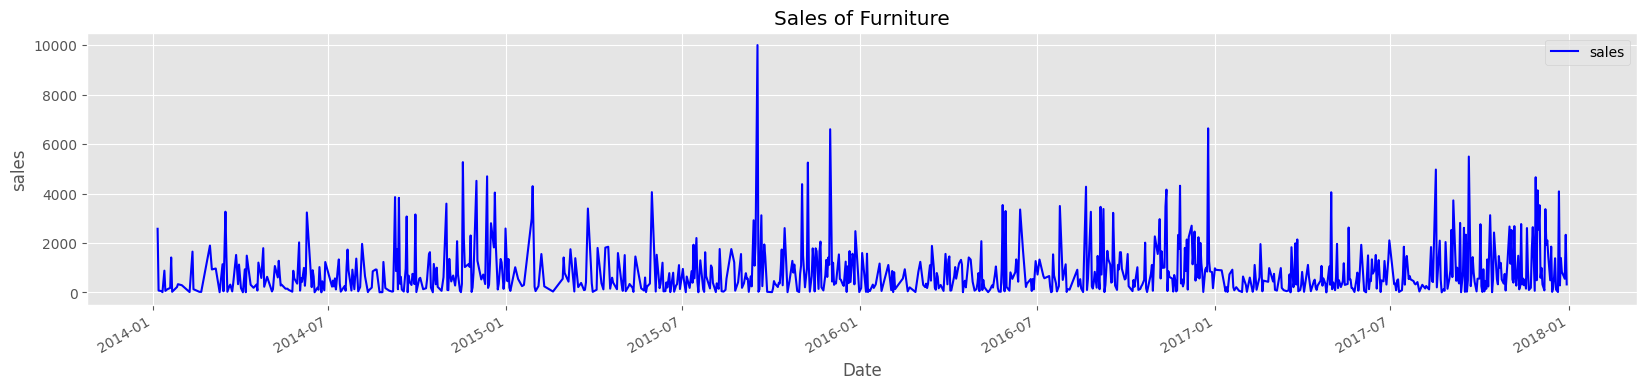

In [ ]:
furniture_sales = furniture[['sales']]
furniture_sales.plot(color='blue',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Furniture")
plt.show()

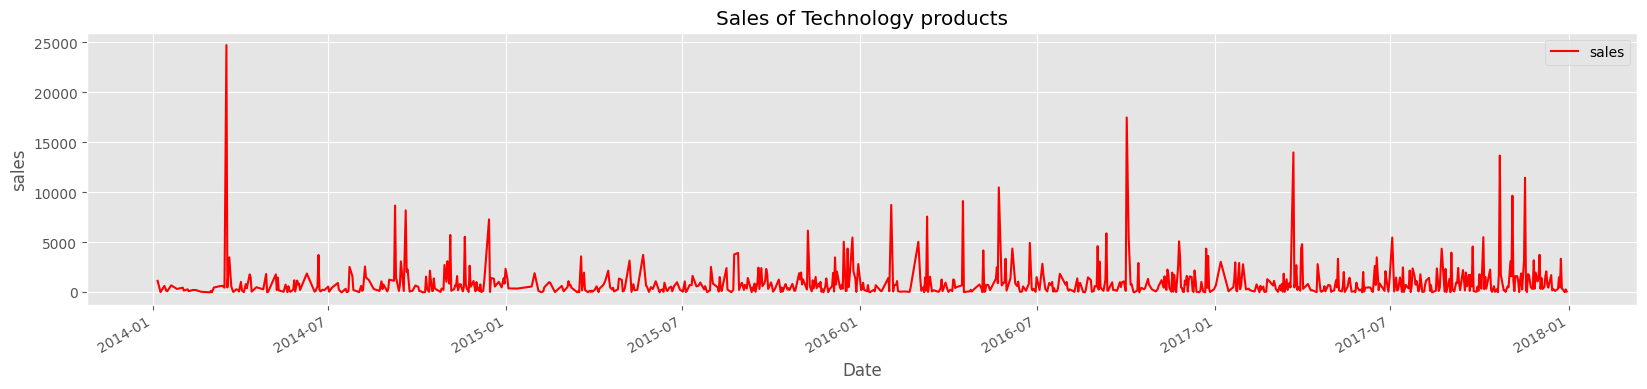

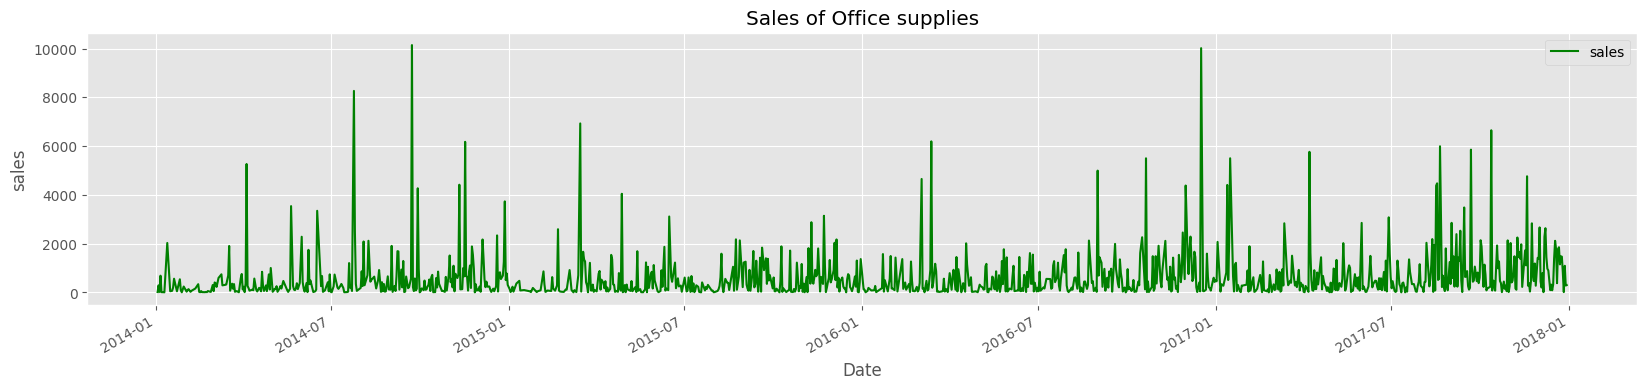

In [ ]:
technology_sales = technology[['sales']]
ax= technology_sales.plot(color='r',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Technology products")
plt.show()

office_sales = office[['sales']]
ax= office_sales.plot(color='green',figsize=(20,4))
ax.set_xlabel("Date")
ax.set_ylabel('sales')
ax.set_title("Sales of Office supplies")
plt.show()

In [ ]:
# Using averages daily sales value - set start of the month as index
avg_furniture_sales = furniture_sales['sales'].resample('MS').mean()
avg_technology_sales = technology_sales['sales'].resample('MS').mean()
avg_office_sales = office_sales['sales'].resample('MS').mean()

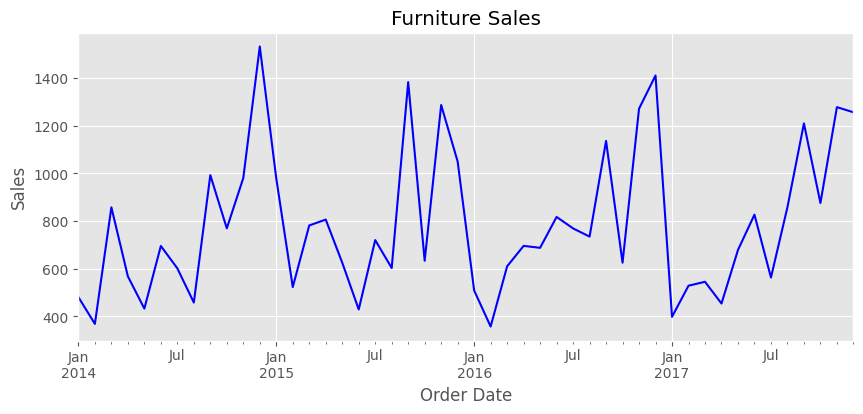

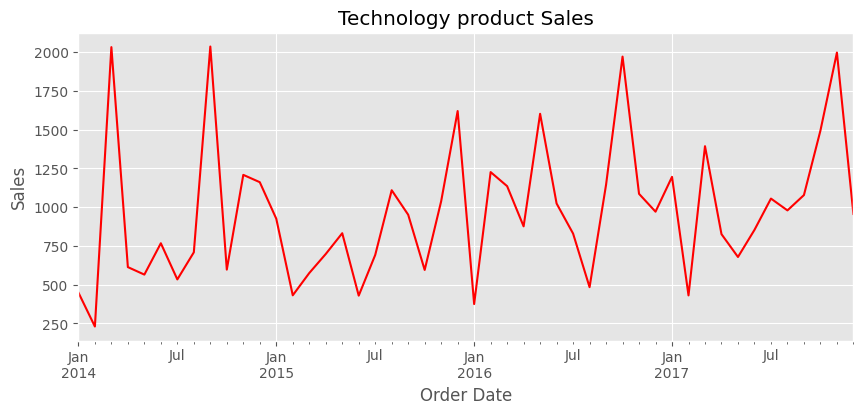

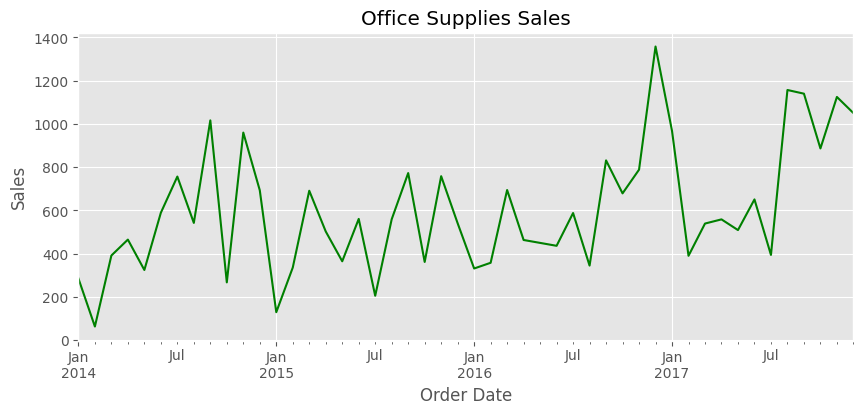

In [ ]:
avg_furniture_sales.plot(figsize=(10, 4),color='blue')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Furniture Sales")
plt.show()

avg_technology_sales.plot(figsize=(10, 4),color='red')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Technology product Sales")
plt.show()

avg_office_sales.plot(figsize=(10, 4),color='green')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Office Supplies Sales")
plt.show()

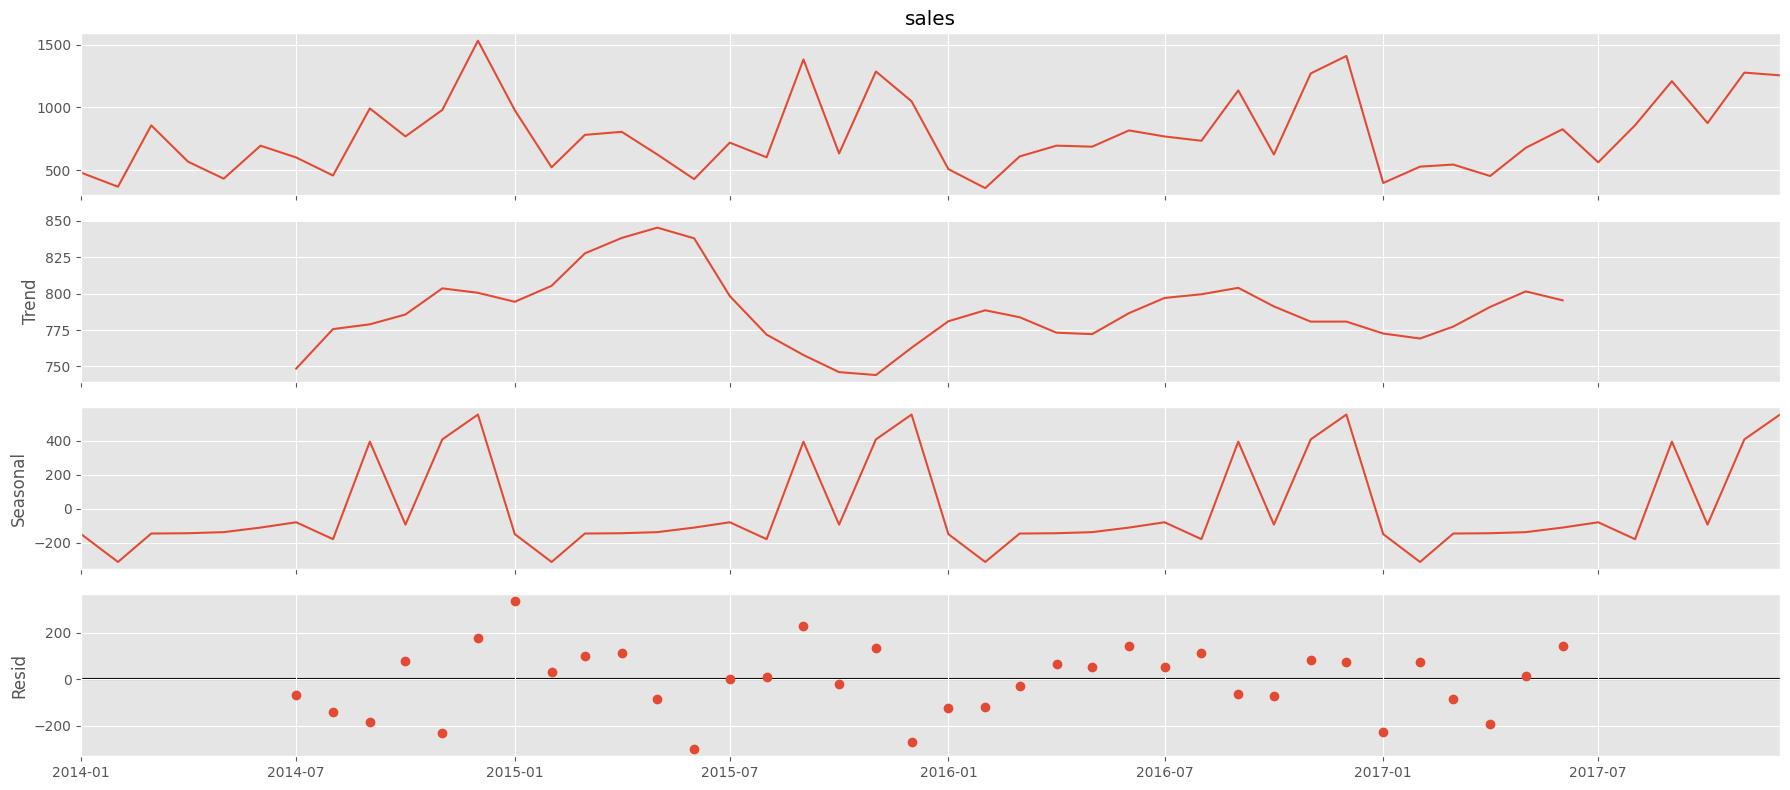

In [ ]:
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(avg_furniture_sales, model='additive')
fig = decomposition.plot()
plt.show()